<a href="https://colab.research.google.com/github/hagusta/colab/blob/master/casava_leaf_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount=True)
kaggle_json='gdrive/MyDrive/kaggle.json'
model_dir='gdrive/MyDrive/casava'
working_dir='/dev/shm'

Mounted at /content/gdrive


In [2]:
!mkdir /root/.kaggle
!cp 'gdrive/MyDrive/kaggle.json' /root/.kaggle
!ls -l /root/.kaggle/

total 4
-rw------- 1 root root 63 Feb 26 11:10 kaggle.json




--------------------------------------------------------------------------------
#Download Data from kaggle
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [3]:
!pip uninstall -y kaggle
!pip install -Uqq kaggle

Uninstalling kaggle-1.5.10:
  Successfully uninstalled kaggle-1.5.10
     |████████████████████████████████| 61kB 3.2MB/s 


In [ ]:
!kaggle competitions download -c cassava-leaf-disease-classification -p $base_dir
!ls -l $base_dir

usage: kaggle competitions download [-h] [-f FILE_NAME] [-p PATH] [-w] [-o]
                                    [-q]
                                    [competition]
kaggle competitions download: error: argument -p/--path: expected one argument
total 8
drwx------ 5 root root 4096 Feb 17 06:12 gdrive
drwxr-xr-x 1 root root 4096 Feb 10 14:40 sample_data


In [ ]:
import zipfile

In [ ]:
import os
list_zip = [f.replace('.zip','') for f in os.listdir(base_dir) if '.zip' in f]
for f in list_zip:
  with zipfile.ZipFile(base_dir + f + '.zip',mode='r') as zf:
    zf.extractall(base_dir+'/casava')

In [ ]:
!ls -l $base_dir
!df -h 

total 6040696
drwxr-xr-x 6 root root       4096 Jan 31 08:45 casava
-rw-r--r-- 1 root root 6185662420 Jan 31 08:43 cassava-leaf-disease-classification.zip
Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   44G   25G  65% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
tmpfs           6.4G   28K  6.4G   1% /var/colab
/dev/sda1        75G   48G   28G  64% /opt/bin
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  2.8G   13G  19% /content/gdrive


In [ ]:
!rm -rf $base_dir/casava/*_tfrecords
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   41G   28G  60% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
tmpfs           6.4G   28K  6.4G   1% /var/colab
/dev/sda1        75G   48G   28G  64% /opt/bin
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  2.8G   13G  19% /content/gdrive


In [ ]:
!ls -l $base_dir/casava

total 1080
-rw-r--r-- 1 root root    172 Jan 31 08:44 label_num_to_disease_map.json
-rw-r--r-- 1 root root     32 Jan 31 08:44 sample_submission.csv
drwxr-xr-x 2 root root   4096 Jan 31 08:44 test_images
-rw-r--r-- 1 root root 358283 Jan 31 08:44 train.csv
drwxr-xr-x 2 root root 729088 Jan 31 08:45 train_images


In [ ]:
!mv $base_dir/casava /dev/shm

In [ ]:
!df -h
!ls -l /dev/shm

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   39G   31G  56% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G  2.5G  3.4G  43% /dev/shm
tmpfs           6.4G   28K  6.4G   1% /var/colab
/dev/sda1        75G   48G   28G  64% /opt/bin
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  2.8G   13G  19% /content/gdrive
total 0
drwxr-xr-x 4 root root 140 Jan 31 08:47 casava


In [ ]:
!tar zcf /dev/shm/casava.tar.gz /dev/shm/casava

tar: Removing leading `/' from member names


In [ ]:
!ls -l /dev/shm

total 0
drwxr-xr-x 4 root root 140 Jan 31 08:47 casava


In [ ]:
!mv /dev/shm/casava.tar.gz $my_drive/casava_data/

In [ ]:
!rm $base_dir/cassava-leaf-disease-classification.zip
!rm -rf $base_dir/test_*
!rm -rf $base_dir/train_*
!ls -l $base_dir
!ls -l $my_drive

rm: cannot remove '/root/casava_disease//cassava-leaf-disease-classification.zip': No such file or directory
total 0
total 178
drwx------ 2 root root   4096 Jan 26 08:52  casava
drwx------ 2 root root   4096 Jan 31 08:52  casava_data
-rw------- 1 root root 144643 Jan 23 10:19 'Form Pemanatauan PTM-hendy-merku-barat-3.pdf'
-rw------- 1 root root  12174 Jan 21 16:44 'Form Pemantauan PTM (1).docx'
-rw------- 1 root root  12191 Jan 22 06:14 'Form Pemantauan PTM.docx'
-rw------- 1 root root     63 Jan 25 03:20  kaggle.json
drwx------ 2 root root   4096 Dec  1 02:59 'my google drive'


--------------------------------------------------------------------------------
#Prep Data
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




In [4]:
import os  
from pathlib import Path 
import pandas as pd
import json
import shutil

In [5]:
!rm -rf /dev/shm/casava/train_image_bkp

In [7]:
!tar xzf gdrive/MyDrive/casava_data/casava.tar.gz --directory /dev/shm

In [8]:
#@title
df=pd.read_csv('/dev/shm/casava/train.csv')
#f=open('/dev/shm/casava/label_num_to_disease_map.json')
#label_name=dict(json.load(f))
label_name_dict=dict({'0':'CBB',
                 '1':'CBSD',
                 '2':'CGM',
                 '3':'CMD',
                 '4':'Healty'})
imgs=df.image_id.to_list()
lbl=df.label.to_list()
labels=[ label_name_dict[str(i)] for i in lbl]
label_dict=dict(zip(imgs,labels))

In [ ]:
import shutil
import random

In [ ]:
idx=random.sample(img_dir, len(img_dir))
len(idx)

2386

In [ ]:
for f in idx[:(len(img_dir) - 200)]:
  #print(f)
  shutil.move(img_path/f,mv_path/f)

In [ ]:
#@title
list_img=None
list_img=[f for f in os.listdir(working_dir+'/casava/train_images')]
imgs=df.image_id.to_list()
lbl=df.label.to_list()
labels=[ label_name_dict[str(i)] for i in lbl]
label_dict=dict(zip(imgs,labels))
fnames=[ Path(working_dir)/'casava'/'train_images'/label_dict[img]/img for img in imgs ]
print(len(labels),len(list_img),labels[:5],list_img[:5],fnames[:5] )

# Prep Data (hide)

In [ ]:
for f in fnames:
  if f.is_file(): 
    cls_path=f.parent/label_dict[f.name]
    #print(cls_path)
    if not cls_path.is_dir():
      os.makedirs(cls_path)
      #print('create: ', cls_path)
    #print(f.name,f.parent,f.parent/label_dict[f.name]/f.name)
    shutil.move(f,cls_path/f.name)

NameError: ignored

In [ ]:
!ls -l /dev/shm/casava/train_images

total 0
drwxr-xr-x 2 root root  21780 Feb  1 06:17 CBB
drwxr-xr-x 2 root root  43820 Feb  1 06:17 CBSD
drwxr-xr-x 2 root root  47760 Feb  1 06:17 CGM
drwxr-xr-x 2 root root 263200 Feb  1 06:17 CMD
drwxr-xr-x 2 root root  51580 Feb  1 06:17 Healty


In [ ]:
!tar zcf /dev/shm/casava.tar.gz /dev/shm/casava --transform='s/dev\/shm\///g'

tar: Removing leading `/' from member names


In [ ]:
!tar -tvf /dev/shm/casava.tar.gz|head

drwxr-xr-x root/root         0 2021-01-31 08:47 casava/
-rw-r--r-- root/root       172 2021-01-31 08:44 casava/label_num_to_disease_map.json
-rw-r--r-- root/root        32 2021-01-31 08:44 casava/sample_submission.csv
drwxr-xr-x root/root         0 2021-01-31 08:44 casava/test_images/
-rw-r--r-- root/root    144281 2021-01-31 08:44 casava/test_images/2216849948.jpg
-rw-r--r-- root/root    358283 2021-01-31 08:44 casava/train.csv
drwxr-xr-x root/root         0 2021-02-01 06:17 casava/train_images/
drwxr-xr-x root/root         0 2021-02-01 06:17 casava/train_images/Healty/
-rw-r--r-- root/root    127827 2021-01-31 08:45 casava/train_images/Healty/999998473.jpg
-rw-r--r-- root/root     99003 2021-01-31 08:45 casava/train_images/Healty/999616605.jpg


In [ ]:
!mv /dev/shm/casava.tar.gz gdrive/MyDrive/casava_data

# Fastai install


In [9]:
!pip install -Uqq fastai
!pip install -Uqq fastbook
import fastai
import fastbook
import torch

fastbook.setup_book()

     |████████████████████████████████| 194kB 5.7MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 727kB 4.1MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 1.2MB 43.2MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 


In [10]:
fastai.__version__

'2.2.7'

In [11]:
!nvidia-smi

Fri Feb 26 11:13:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    28W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
print(torch.device.type)
print(torch.__version__)
print(torch.version.cuda)
os.environ

<attribute 'type' of 'torch.device' objects>
1.7.0+cu101
10.1


environ({'NO_GCE_CHECK': 'True', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', '__EGL_VENDOR_LIBRARY_DIRS': '/usr/lib64-nvidia:/usr/share/glvnd/egl_vendor.d/', 'CUDA_VERSION': '10.1.243', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/lib64-nvidia', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'CUDA_PKG_VERSION': '10-1=10.1.243-1', 'SHLVL': '0', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.8.3', 'NVIDIA_VISIBLE_DEVICES': 'all', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '7.6.5.32', 'LAST_FORCED_REBUILD': '202102019', 'JPY_PARENT_PID': '47', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""],"debugAdapterMultiplexerPath":

# Data Loader

In [13]:
from fastai.vision.all import *

In [14]:
def get_label(o): return label_dict[o.name]
path=Path('/dev/shm/casava/train_images')

In [15]:
def getStratifiedPathClassFiles(valid_pct=0.2, seed=2, n_sample=1000 ,**kwargs):
  spliter=RandomSplitter(valid_pct=valid_pct,seed=seed)
  def _inner(o, **kwargs):
    if isinstance(o,Path): o=get_image_files(o)
    it,iv = spliter(o)
    t=o[it]
    v=o[iv]
    cls=[]
    td=[]
    _=[ cls.append(f.parent.name) for f in o if f.parent.name not in cls]
    n=int(n_sample/len(cls))
    for k,c in enumerate(cls):
      tcls=L([f for f in t if f.parent.name==c]).cycle()
      td=td+[ [next(tcls),c,False] for i in range(n)]
    vd=[ [f,f.parent.name,True] for f in v]
    return L(random.sample(td,len(td)) + vd ) 
  return _inner

def get_x(o): return o[0]
def get_y(o): return o[1]
def spliter(o): 
  def get_split(b:bool):return [id for id,f in enumerate(o) if f[2]==b]
  return get_split(False), get_split(True)

In [16]:
casava=DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=getStratifiedPathClassFiles(seed=42,n_sample=20000), 
    splitter=spliter,
    get_x=get_x,
    get_y=get_y,
    item_tfms=Resize(512),
    #batch_tfms=[*aug_transforms(size=224,mult=2),Normalize.from_stats(*imagenet_stats)]
    )

In [23]:
#del casava
casava2=DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=get_label,
    item_tfms=Resize(512),
    batch_tfms=aug_transforms(size=448,mult=2)
    )

In [24]:
dls = casava.dataloaders(path,bs=16)

In [25]:
dls= casava2.dataloaders(path,bs=16)

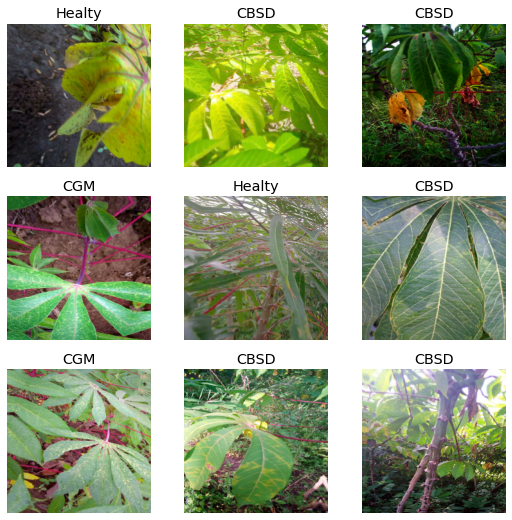

In [17]:
dls.train.show_batch(max_n=9, nrows=3)

In [18]:
casava.summary(path)

Setting-up type transforms pipelines
Found 14279 items
2 datasets of sizes 10000,4279
Setting up Pipeline: get_x -> PILBase.create
Setting up Pipeline: get_y -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: get_x -> PILBase.create
    starting from
      [/dev/shm/casava/train_images/CGM/2434985861.jpg, CGM, False]
    applying get_x gives
      /dev/shm/casava/train_images/CGM/2434985861.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=800x600
  Pipeline: get_y -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      [/dev/shm/casava/train_images/CGM/2434985861.jpg, CGM, False]
    applying get_y gives
      CGM
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(2)

Final sample: (PILImage mode=RGB size=800x600, TensorCategory(2))


Found 14279 items
2 datasets of sizes 10000,4279
Setting up Pipeline: get_x -> PILBase.create
Setting up Pipe

In [ ]:
#@title
#casava = casava.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
casava = casava.new(item_tfms=Resize(460), 
                    batch_tfms=aug_transforms(size=224,mult=2),
#                    splitter=RandomSplitter(valid_pct=0.2, seed=42)
                    )
#dls.train.show_batch(max_n=16, nrows=4)

# Learner

In [26]:
#del learn
learn = cnn_learner(dls,
                    models.resnet18,
                    metrics=[accuracy,error_rate])


In [19]:
model_path=Path('gdrive/MyDrive/casava').absolute()
learn.load(model_path/'casava_resnet18.1')

In [27]:
learn.to_fp16()

# Train

In [28]:
learn.freeze()
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,error_rate,time


KeyboardInterrupt: ignored

SuggestedLRs(lr_min=1.0964781722577755e-07, lr_steep=4.365158408348169e-12)

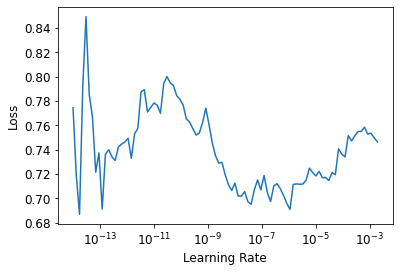

In [21]:
learn.unfreeze()
learn.lr_find(start_lr=1e-14,end_lr=10e-03,stop_div=False)
#learn.lr_find()

In [22]:
#learn.fit_one_cycle(20, lr_max=slice(1e-5,1e-3))
learn.fit_one_cycle(5, lr_max=1e-8)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.754135,0.448407,0.843889,0.156111,03:54
1,0.745431,0.492836,0.824024,0.175976,03:53
2,0.772519,0.459942,0.840383,0.159617,03:49
3,0.780896,0.448483,0.838981,0.161019,03:48
4,0.805585,0.475635,0.831503,0.168497,03:46


In [ ]:
learn.fit_one_cycle(5, lr_max=4e-13)

In [ ]:
model_path=Path('gdrive/MyDrive/casava').absolute()
model_path

Path('/content/gdrive/MyDrive/casava')

In [ ]:
learn.export(model_path/'casava_resnet18.2.pkl')
learn.save(model_path/'casava_resnet18.2')

Path('/content/gdrive/MyDrive/casava/casava_resnet18.1.pth')

# Train Resnext50_32x4d

In [ ]:
!pip install timm

     |████████████████████████████████| 245kB 8.0MB/s 


In [ ]:
import timm

In [ ]:
def resnext50_32x4d(pretrained=False):
    pretrained = 'imagenet' if pretrained else None
    model = timm.create_model('resnext50_32x4d', pretrained=pretrained)
    all_layers = list(model.children())
    return nn.Sequential(all_layers[0], *all_layers[1:])


In [ ]:
learn = cnn_learner(dls, partial(resnext50_32x4d,pretrained=True), metrics=accuracy).to_fp16()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnext50_32x4d_ra-d733960d.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d_ra-d733960d.pth


In [ ]:
model_path=Path('gdrive/MyDrive/casava').absolute()
learn.load(model_path/'casava_resnext50_32x4d')

In [ ]:
learn.freeze()
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.806518,0.659349,0.761159,07:11
1,0.655442,0.548391,0.799252,07:12
2,0.656563,0.529137,0.810236,07:12


SuggestedLRs(lr_min=6.309573523377577e-13, lr_steep=3.981071548808668e-12)

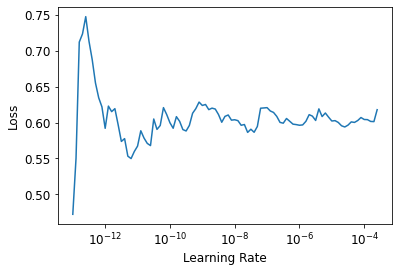

In [ ]:
learn.unfreeze()
learn.lr_find(start_lr=1e-13,end_lr=1e-03,stop_div=False)

In [ ]:
learn.fit_one_cycle(10,lr_max=slice(1e-13))

epoch,train_loss,valid_loss,accuracy,time
0,0.815922,0.704566,0.749240,07:44
1,0.878007,0.694419,0.749240,07:43
2,0.931646,0.699370,0.750876,07:42
3,0.885705,0.706668,0.746202,07:42
4,0.884155,0.708954,0.745034,07:42


In [ ]:
learn.fit_one_cycle(10,lr_max=slice(1e-13))

epoch,train_loss,valid_loss,accuracy,time
0,0.619639,0.528504,0.810002,07:41
1,0.665584,0.526233,0.812106,07:41
2,0.605909,0.527194,0.811638,07:41
3,0.643082,0.527998,0.810002,07:41
4,0.610414,0.528980,0.809301,07:41
5,0.579359,0.528331,0.810470,07:41
6,0.663430,0.528354,0.812573,07:42
7,0.590059,0.530307,0.810236,07:42
8,0.590230,0.528393,0.810470,07:42
9,0.615747,0.525172,0.811405,07:42


In [ ]:
model_path=Path('gdrive/MyDrive/casava').absolute()
learn.export(model_path/'casava_resnext50_32x4d.pkl')
learn.save(model_path/'casava_resnext50_32x4d')

Path('/content/gdrive/MyDrive/casava/casava_resnext50_32x4d.pth')

# Interpretation

In [ ]:
import gc
#del interp
del learn
gc.collect()

1654

In [ ]:
#del learn
learn = cnn_learner(dls,
                    models.resnet18,
                    metrics=error_rate)

In [ ]:
learn=learn.load('/content/gdrive/MyDrive/casava/casava_resnet18.2')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
#3
interp.print_classification_report()

              precision    recall  f1-score   support

         CBB       0.50      0.22      0.30       218
        CBSD       0.37      0.69      0.49       454
         CGM       0.58      0.36      0.44       497
         CMD       0.90      0.79      0.84      2586
      Healty       0.41      0.59      0.49       524

    accuracy                           0.68      4279
   macro avg       0.55      0.53      0.51      4279
weighted avg       0.72      0.68      0.69      4279



In [ ]:
#2
interp.print_classification_report()

              precision    recall  f1-score   support

         CBB       0.55      0.21      0.30       218
        CBSD       0.46      0.76      0.58       454
         CGM       0.66      0.48      0.56       497
         CMD       0.94      0.77      0.85      2586
      Healty       0.42      0.76      0.54       524

    accuracy                           0.71      4279
   macro avg       0.61      0.60      0.57      4279
weighted avg       0.77      0.71      0.72      4279



In [ ]:
#1
interp.print_classification_report()

              precision    recall  f1-score   support

         CBB       0.55      0.44      0.49       218
        CBSD       0.67      0.71      0.69       454
         CGM       0.80      0.50      0.61       497
         CMD       0.94      0.88      0.91      2586
      Healty       0.46      0.79      0.58       524

    accuracy                           0.78      4279
   macro avg       0.69      0.66      0.66      4279
weighted avg       0.82      0.78      0.79      4279



In [ ]:
top=interp.top_losses(100)

In [ ]:
top[1]

TensorBase([2976, 3674, 1556, 1257, 1012, 2947, 4221, 1804, 1584,  990, 2831,  452,
        3752, 3812, 1605, 4000, 1274,  432, 1068, 1923,  931,  567, 3053, 1313,
        3013, 3060, 2099, 2018,  348, 3869, 2681, 1729, 1316, 3498, 2803, 1587,
         645, 1880, 2486, 2442, 1382, 1266,   75, 2886, 1998, 2690, 3923, 3667,
        1420, 1406, 2335,  712,   29,   90, 4261, 2043, 3319, 2347, 3930, 1300,
        3454, 2326,  320, 3190, 2095,  600,  298,  346, 1817,  563, 2966, 2054,
        1297, 3778, 1465, 3926,  501, 3326,  748, 2800, 2670, 2871, 2199,  407,
        1350, 2832, 2921, 4014, 2311, 1267, 3139, 1071, 3280, 3180, 3052, 2100,
        2091, 4089, 2743, 3675])

# Load Train

In [ ]:
!cp '/content/gdrive/MyDrive/casava/casava_resnet18.pth' /root
!cp '/content/gdrive/MyDrive/casava/casava_resnet18.pkl' /root

In [ ]:
!ls -l '/dev/shm/casava/test_images/2216849948.jpg'

-rw-r--r-- 1 root root 144281 Jan 31 08:44 /dev/shm/casava/test_images/2216849948.jpg


In [ ]:
test_img=Image.open('/dev/shm/casava/test_images/2216849948.jpg')
path_img=Path('/dev/shm/casava/test_images/2216849948.jpg')

In [ ]:
#learn_inf = load_learner('/content/gdrive/MyDrive/casava/casava_resnet18.3.pkl')

In [ ]:
learn.predict(path_img)

/usr/local/lib/python3.6/dist-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


('Healty', tensor(4), tensor([0.0938, 0.0531, 0.2432, 0.0525, 0.5574]))

In [ ]:
learn_inf.predict(path_img)

('Healty',
 tensor(4),
 tensor([3.9227e-07, 5.8654e-06, 1.4852e-03, 1.2919e-03, 9.9722e-01]))

In [ ]:
!df 

Filesystem     1K-blocks     Used Available Use% Mounted on
overlay         71724152 36675936  35031832  52% /
tmpfs              65536        0     65536   0% /dev
tmpfs            6666796        0   6666796   0% /sys/fs/cgroup
shm              6029312  2543192   3486120  43% /dev/shm
/dev/sda1       78224816 38255740  39952692  49% /opt/bin
tmpfs            6666796       36   6666760   1% /var/colab
tmpfs            6666796        0   6666796   0% /proc/acpi
tmpfs            6666796        0   6666796   0% /proc/scsi
tmpfs            6666796        0   6666796   0% /sys/firmware
drive           15728640  5459948  10268692  35% /content/gdrive


In [ ]:
!free

              total        used        free      shared  buff/cache   available
Mem:       13333596     9677624      490504     2556524     3165468     6470852
Swap:             0           0           0


In [ ]:
import gc
gc.collect()

82

In [ ]:
del learn_inf

NameError: ignored